In [2]:
import numpy as np
import matplotlib.pyplot as plt
import re
from twython import Twython
from PIL import Image
from wordcloud import WordCloud, STOPWORDS
from IPython.display import Image as im

In [4]:
#Connect to Twitter
APP_KEY = '1IdPmbjVIYRo2zsvXSZOBivdd'
APP_SECRET = 'FDzoBQTDWfMhlGWBxgz0Hsj8cw0E09ALVGRtfXUV1o0aSxuXYz'
twitter = Twython(APP_KEY, APP_SECRET)

In [7]:
#Get timeline 

## Collect tweets from the president throughout the year
user_timeline=twitter.get_user_timeline(screen_name='realDonaldTrump',count=1) #screen_name is twitter handle

In [8]:
#get most recent id

#has had 1600 tweets since the beginning of the year
last_id = user_timeline[0]['id']-1
for i in range(16):
    batch = twitter.get_user_timeline(screen_name='realDonaldTrump',count=1600, max_id=last_id)
    user_timeline.extend(batch)
    last_id = user_timeline[-1]['id'] - 1

In [9]:
user_timeline[0:10]

[{'created_at': 'Wed May 20 18:34:49 +0000 2020',
  'id': 1263176366440296450,
  'id_str': '1263176366440296450',
  'text': 'https://t.co/tE21sk7MR3',
  'truncated': False,
  'entities': {'hashtags': [],
   'symbols': [],
   'user_mentions': [],
   'urls': [{'url': 'https://t.co/tE21sk7MR3',
     'expanded_url': 'https://www.whitehouse.gov/presidential-actions/executive-order-regulatory-relief-support-economic-recovery/',
     'display_url': 'whitehouse.gov/presidential-a…',
     'indices': [0, 23]}]},
  'source': '<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>',
  'in_reply_to_status_id': None,
  'in_reply_to_status_id_str': None,
  'in_reply_to_user_id': None,
  'in_reply_to_user_id_str': None,
  'in_reply_to_screen_name': None,
  'user': {'id': 25073877,
   'id_str': '25073877',
   'name': 'Donald J. Trump',
   'screen_name': 'realDonaldTrump',
   'location': 'Washington, DC',
   'description': '45th President of the United States of America🇺🇸',
 

In [10]:
#Extract textfields from tweets
raw_tweets = []
for tweets in user_timeline:
    raw_tweets.append(tweets['text'])

In [11]:
raw_tweets

['https://t.co/tE21sk7MR3',
 'https://t.co/l4StnpkZop',
 'Michigan sends absentee ballot applications to 7.7 million people ahead of Primaries and the General Election. This… https://t.co/O2Y8dXRvmd',
 '....beaten Sleepy Joe in a LANDSLIDE, every State, if these events didn’t happen. Even if Warren just dropped out,… https://t.co/Qj2Le6SvC7',
 'Crazy Bernie Sanders is not a fighter. He gives up too easy! The Dem establishment gets Alfred E. Newman (Mayor Pet… https://t.co/NnGFQGRgMA',
 'Congratulations to my daughter, Tiffany, on graduating from Georgetown Law. Great student, great school. Just what… https://t.co/BLNKYQnUkV',
 'The Tulsa, Oklahoma area has been approved for a transportation loan from the @USDOT of up to $120M to help expand… https://t.co/KrxVU2RQmA',
 'We have sent our best Military &amp; @FEMA Teams, already there. Governor must now “set you free” to help. Will be with… https://t.co/YSMwbY48iU',
 'Great news for the Dallas area! Dallas Area Rapid Transit (DART) will b

In [12]:
#Clean the data by removing URL links, special characters, emojis, and extra white spaces.

raw_string = ''.join(raw_tweets)
no_links = re.sub(r'http\S+', '', raw_string)
no_unicode = re.sub(r"\\[a-z][a-z]?[0-9]+", '', no_links)
no_special_characters = re.sub('[^A-Za-z ]+', '', no_unicode)

In [14]:
words = no_special_characters.split(" ")
words = [w for w in words if len(w) > 2]  # ignore a, an, be, any smaller words ...
words = [w.lower() for w in words]
words = [w for w in words if w not in STOPWORDS] #from a built in list of stopwords

In [16]:
words

['sends',
 'absentee',
 'ballot',
 'applications',
 'million',
 'people',
 'ahead',
 'primaries',
 'general',
 'election',
 'sleepy',
 'joe',
 'landslide',
 'every',
 'state',
 'events',
 'didnt',
 'happen',
 'even',
 'warren',
 'dropped',
 'bernie',
 'sanders',
 'fighter',
 'gives',
 'easy',
 'dem',
 'establishment',
 'gets',
 'alfred',
 'newman',
 'mayor',
 'pet',
 'daughter',
 'tiffany',
 'graduating',
 'georgetown',
 'law',
 'great',
 'student',
 'great',
 'school',
 'tulsa',
 'oklahoma',
 'area',
 'approved',
 'transportation',
 'loan',
 'usdot',
 'help',
 'expand',
 'sent',
 'best',
 'military',
 'amp',
 'fema',
 'teams',
 'already',
 'governor',
 'must',
 'now',
 'set',
 'free',
 'help',
 'will',
 'news',
 'dallas',
 'area',
 'dallas',
 'area',
 'rapid',
 'transit',
 'dart',
 'will',
 'receiving',
 'funding',
 'keep',
 'front',
 'team',
 'closely',
 'monitoring',
 'flooding',
 'central',
 'michigan',
 'stay',
 'safe',
 'listen',
 'local',
 'officials',
 'brave',
 'country',
 'tr

In [21]:
logo = np.array(Image.open('Datasets/10wmt-superJumbo-v4.jpg'))

In [24]:
wc = WordCloud(background_color="white", max_words=100, mask=logo)
clean_string = ','.join(words)
wc.generate(clean_string)

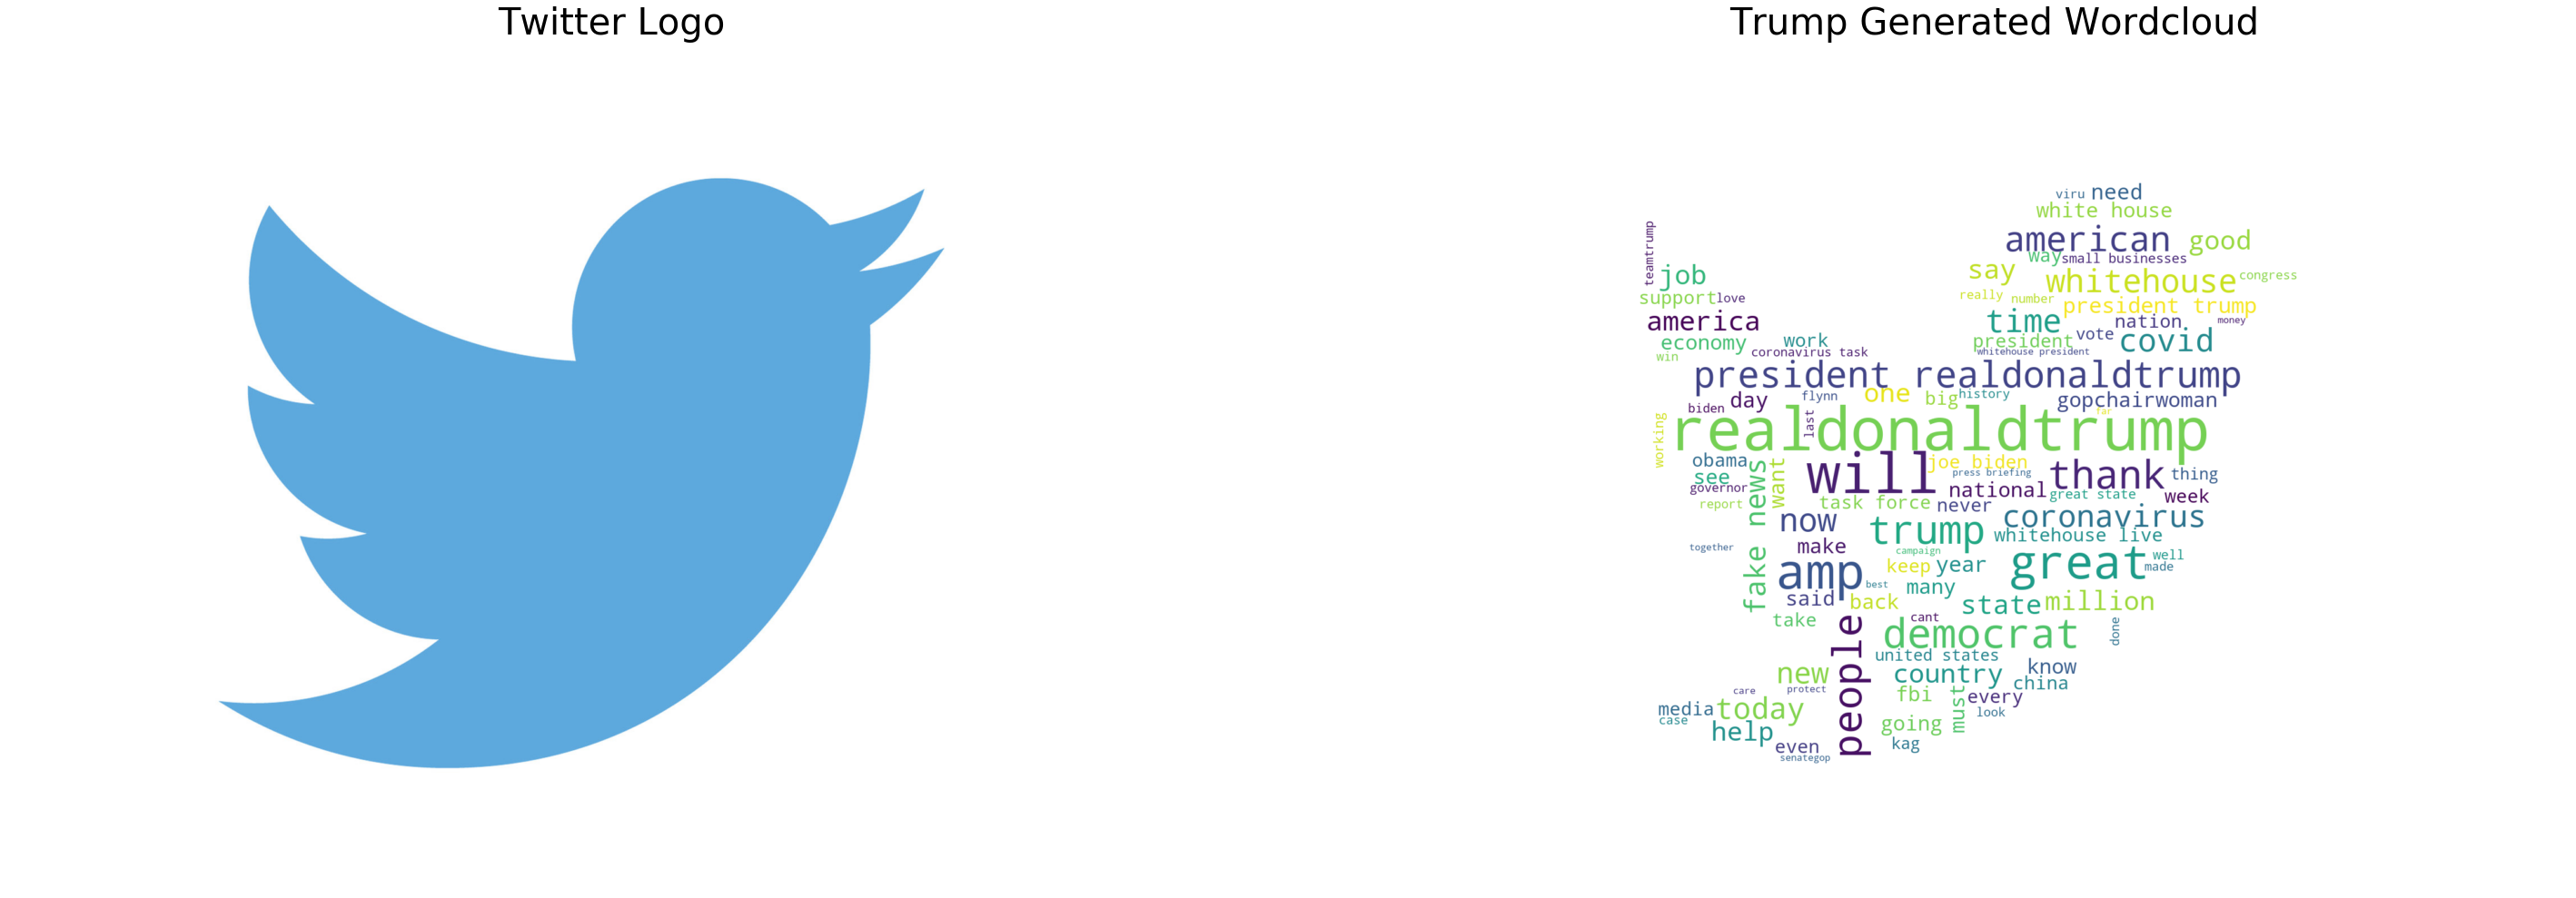

In [25]:
f = plt.figure(figsize=(50,50))
f.add_subplot(1,2, 1)
plt.imshow(logo, cmap=plt.cm.gray, interpolation='bilinear')
plt.title('Twitter Logo', size=40)
plt.axis("off")

f.add_subplot(1,2, 2)
plt.imshow(wc, interpolation='bilinear')
plt.title('Trump Generated Wordcloud', size=40)
plt.axis("off")

plt.savefig
plt.show()